# Basic Imports and useful Informations
- API:- https://swapi.dev/api/
- Repo Link:- https://github.com/SNEHILUPADHYAY007/ForceOfConcurrency/
- Root Path:- D:\data-engineering-projects\ForceOfConcurrency

In [4]:
from threading import *
from time import *
from queue import *
import os
import requests
import json

# Initial Setup

**Multithreading Data Pulling Setup:-**


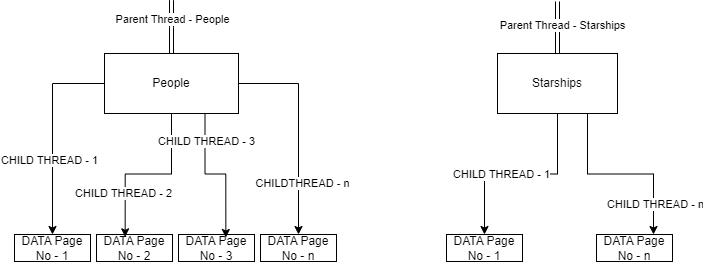

**Data Writing Setup:-**

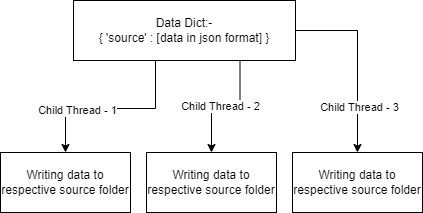


In [9]:
keys = []
root_path = 'D:\\data-engineering-projects\\ForceOfConcurrency'
api_path = 'https://swapi.dev/api'
data_dict = {}
url = {}

# Function to get the initial data from the API
def get_initial_data():
    try:
        # GET the initial info from the API
        with requests.get(api_path) as req:
            if req.status_code == 200:
                # Storing the result in a list
                global keys
                keys = list(req.json().keys()).copy()
    
        # preparing the dict to hold the json data for respective keys
        for key in keys:
            data_dict[key] = []
            url[key] = []
    except Exception as e:
        print("Some Exception occured while getting initial data",e)
        
# Creating the Required folders if not exist
def create_folders():
    # Creating required directory and folders for storing the results
    if os.path.isdir(f'{root_path}\\data'):
        print('Yes path exist')
    else:
        print('Path donot exist...we need to create it')
        os.mkdir(f'{root_path}\\data')
        
        for api_paths in keys:
            os.mkdir(f'{root_path}\\data\\{api_paths}')
        
        print('Paths successfully created!!!')
        
# Get single page response and append in respective list
def get_single_page_data(url, endpoint):
    try:
        with requests.get(url) as req:
            if req.status_code == 200:
                data = req.json()
                data_dict[endpoint].append(data)
    except Exception as e:
        print(f"Some Exception occured while reading the data for {url}:{e}")
        
# Function to get the data from the API
def get_data(endpoint):
    pages = 0
    try:
        # Calculating Total Pages for each API Endpoint
        req = requests.get(f'{api_path}/{endpoint}')
        if req.status_code == 200:
            req = req.json()
            total_pages = divmod(req['count'], len(req['results']))
            if total_pages[1] > 0:
                pages = total_pages[0] + 1
            else:
                pages = total_pages[0]
    
        source = [f'{api_path}/{endpoint}/?page={page_no}' for page_no in range(1, pages + 1)]
        url[endpoint] = source
        
        # If wanted to fetch using single thread / API Endpoint. 
        # for i in url:
        #     get_single_page_data(i, endpoint)
        # print(url)
    except Exception as e:
        print(f"Some Exception occured while preparing the urls for {endpoint}:{e}")

# Function to create the files for respective sources and storing in the respective folder path
def file_op(source):
    print(f"file writing for {source} started")
    file_path = f"{root_path}\\data\\{source}\\{source}.json"
    try:
        with open(file_path, 'w') as f:
            f.write(json.dumps(data_dict[source]))
    except Exception as e:
        print("Some error occured while writing the file",e)
    
def main(): 
    # Getting initial data from the API
    get_initial_data()

    # Creating the required files to store the files
    create_folders()

    # Creating Parent threads for each endpoint.
    # Each Thread is responsible to produce the API URLS for their respective endpoint
    threads = []
    for i in keys:
        th = Thread(target = get_data, args=(i,), name = f"thread_{i}")
        threads.append(th)
        th.start()
    
    # Making sure main doesn't stop until these threads complete the execution
    for thread in threads:
        thread.join()
   
    # Creating Child threads for respective endpoint.
    # Child threads == pages(calculated above)
    # Each child thread will be pulling the different url concurrently and storing the result in the dict against respective key
    child_threads = []
    cnt = 0
    for key, value in url.items():
        urls = url[key]
        for u in urls:
            child_th = Thread(target = get_single_page_data, args = (u, key), name = (f"child_thread_key_{key}"))
            child_threads.append(child_th)
            child_th.start()
        
    # Making sure main doesn't stop until these threads complete the execution
    for i in child_threads:
        i.join()

    print("DATA fetched successfully")
    print("Starting Creating the JSON file for respective sources")

    file_op_threads = []
    for i in keys:
        file_op_th = Thread(target = file_op, args = (i,), name = (f"file_op_{key}"))
        file_op_threads.append(file_op_th)
        file_op_th.start()

    # Making sure main doesn't stop until these threads complete the execution
    for i in file_op_threads:
        i.join()
        

# Calling the main function
main()
# print(data_dict)
print("Everything Completed Hence Exiting!!!")

Yes path exist
DATA fetched successfully
Starting Creating the JSON file for respective sources
file writing for people started
file writing for planets started
file writing for films started
file writing for species started
file writing for vehicles started
file writing for starships started
Everything Completed Hence Exiting!!!
